In [1]:
import numpy as np
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

In [33]:
def huber_loss(y_pred, y, delta=1.0):
    huber_mse = 0.5*(y-y_pred)**2
    huber_mae = delta * (np.abs(y - y_pred) - 0.5 * delta)
    return np.where(np.abs(y - y_pred) <= delta, huber_mse, huber_mae)

In [34]:
data_dir = '/storage/yw18581/data/'
data_folder = os.path.join(data_dir, 'train_validation_test')
clean_dir = os.path.join(data_folder, 'clean_300_june')

In [35]:
unet_dir = os.path.join(data_dir, "trained_models",
                        "UNet_training_generator_1500epochs")

In [36]:
def cut_X(arr, reshape = None):
    x_cut = arr[:,960:1300,600:]
    if reshape:
        if len(x_cut.shape)>3:
            x_cut = x_cut[...,0]
            x_cut_out = x_cut.reshape(x_cut.shape[0],x_cut.shape[1]*x_cut.shape[2])
    else:
        x_cut_out = x_cut
    return x_cut_out

def reshape_RF(arr):
    arr_RF = arr.reshape((arr.shape[0], arr.shape[1]*arr.shape[2]))
    return arr_RF

In [37]:
def cut_reshape(arr):
    arr_cut = cut_X(arr)
    arr_RF = reshape_RF(arr_cut)
    return arr_RF

In [38]:
def import_splitted_gt(pos):
    Xy = np.load(os.path.join(clean_dir,"Xy_"+pos+"_clean300_june.npz"))
    X = Xy["y"]
    y = Xy["dist"]
    X_RF = cut_reshape(X)
    indices = np.load(os.path.join(data_folder,"RF_train_test_indices_80_20_"+pos+"_clean.npz"))
    training_indices = indices["train"]
    test_indices = indices["test"]
    X_RF_train = X_RF[training_indices]
    y_train = y[training_indices]
    X_RF_test = X_RF[test_indices]
    y_test = y[test_indices]
    return X_RF_train, y_train, X_RF_test, y_test

In [10]:
X_1mm_cl_RF_train, y_1mm_cl_train, X_1mm_cl_RF_test, y_1mm_cl_test  = import_splitted_gt("1mm")
X_2mm_cl_RF_train, y_2mm_cl_train, X_2mm_cl_RF_test, y_2mm_cl_test = import_splitted_gt("2mm")
X_3mm_cl_RF_train, y_3mm_cl_train, X_3mm_cl_RF_test, y_3mm_cl_test = import_splitted_gt("3mm")
X_4mm_cl_RF_train, y_4mm_cl_train, X_4mm_cl_RF_test, y_4mm_cl_test= import_splitted_gt("4mm")
X_10mm_cl_RF_train, y_10mm_cl_train, X_10mm_cl_RF_test, y_10mm_cl_test = import_splitted_gt("10mm")
X_15mm_cl_RF_train, y_15mm_cl_train, X_15mm_cl_RF_test, y_15mm_cl_test = import_splitted_gt("15mm")
X_20mm_cl_RF_train, y_20mm_cl_train, X_20mm_cl_RF_test, y_20mm_cl_test = import_splitted_gt("20mm")
X_25mm_cl_RF_train, y_25mm_cl_train, X_25mm_cl_RF_test, y_25mm_cl_test = import_splitted_gt("25mm")
X_30mm_cl_RF_train, y_30mm_cl_train, X_30mm_cl_RF_test, y_30mm_cl_test = import_splitted_gt("30mm")
X_35mm_cl_RF_train, y_35mm_cl_train, X_35mm_cl_RF_test, y_35mm_cl_test = import_splitted_gt("35mm")

In [11]:
X_train = np.vstack((X_1mm_cl_RF_train, X_2mm_cl_RF_train, X_3mm_cl_RF_train, X_4mm_cl_RF_train, X_10mm_cl_RF_train,
              X_15mm_cl_RF_train, X_20mm_cl_RF_train, X_25mm_cl_RF_train, X_30mm_cl_RF_train, X_35mm_cl_RF_train))
y_train =  np.hstack((y_1mm_cl_train, y_2mm_cl_train, y_3mm_cl_train, y_4mm_cl_train, y_10mm_cl_train, 
                     y_15mm_cl_train, y_20mm_cl_train, y_25mm_cl_train, y_30mm_cl_train, y_35mm_cl_train))



In [12]:
X_test = np.vstack((X_1mm_cl_RF_test, X_2mm_cl_RF_test, X_3mm_cl_RF_test, X_4mm_cl_RF_test, X_10mm_cl_RF_test,
              X_15mm_cl_RF_test, X_20mm_cl_RF_test, X_25mm_cl_RF_test, X_30mm_cl_RF_test,X_35mm_cl_RF_test))

y_test =  np.hstack((y_1mm_cl_test, y_2mm_cl_test, y_3mm_cl_test, y_4mm_cl_test, y_10mm_cl_test, 
                     y_15mm_cl_test, y_20mm_cl_test, y_25mm_cl_test, y_30mm_cl_test, y_35mm_cl_test))

In [13]:
model = RandomForestRegressor(random_state=42, n_estimators=50, n_jobs=2, verbose=2)

In [14]:
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  3.7min


building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:  4.8min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
           oob_score=False, random_state=42, verbose=2, warm_start=False)

In [15]:
pickle.dump(model, open(os.path.join(data_dir,"RF50_trained_model_clean300_june_data.npz"), 'wb'))

In [14]:
loaded_model = pickle.load(open(os.path.join(data_dir,"RF30x_trained_model_clean_data.npz"), 'rb'))

In [39]:
model_huber = RandomForestRegressor(random_state=42, n_estimators=50, n_jobs=2, verbose=2, criterion=huber_loss)

In [40]:
model_huber.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50


KeyError: <function huber_loss at 0x7efc56a7d158>

In [16]:
mean_squared_error(model.predict(X_test), y_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


0.042151620947630974

In [17]:
errors = []
print("test",mean_squared_error(model.predict(X_test), y_test))
#print("1mm", mean_squared_error(model.predict(X_1mm_cl_RF_test), y_1mm_cl_test))
errors.append([1, mean_squared_error(model.predict(X_1mm_cl_RF_test), y_1mm_cl_test)])
#print("2mm",mean_squared_error(model.predict(X_2mm_cl_RF_test), y_2mm_cl_test))
errors.append([2, mean_squared_error(model.predict(X_2mm_cl_RF_test), y_2mm_cl_test)])
#print("3mm",mean_squared_error(model.predict(X_3mm_cl_RF_test), y_3mm_cl_test))
errors.append([3, mean_squared_error(model.predict(X_3mm_cl_RF_test), y_3mm_cl_test)])
#print("4mm",mean_squared_error(model.predict(X_4mm_cl_RF_test), y_4mm_cl_test))
errors.append([4, mean_squared_error(model.predict(X_4mm_cl_RF_test), y_4mm_cl_test)])
#print("10mm",mean_squared_error(model.predict(X_10mm_cl_RF_test), y_10mm_cl_test))
errors.append([10, mean_squared_error(model.predict(X_10mm_cl_RF_test), y_10mm_cl_test)])
#print("15mm",mean_squared_error(model.predict(X_15mm_cl_RF_test), y_15mm_cl_test))
errors.append([15, mean_squared_error(model.predict(X_15mm_cl_RF_test), y_15mm_cl_test)])
#print("20mm",mean_squared_error(model.predict(X_20mm_cl_RF_test), y_20mm_cl_test))
errors.append([20, mean_squared_error(model.predict(X_20mm_cl_RF_test), y_20mm_cl_test)])
#print("25mm",mean_squared_error(model.predict(X_25mm_cl_RF_test), y_25mm_cl_test))
errors.append([25, mean_squared_error(model.predict(X_25mm_cl_RF_test), y_25mm_cl_test)])
#print("30mm",mean_squared_error(model.predict(X_30mm_cl_RF_test), y_30mm_cl_test))
#errors.append([30, mean_squared_error(model.predict(X_30mm_cl_RF_test), y_30mm_cl_test)])
#print("35mm",mean_squared_error(model.predict(X_35mm_cl_RF_test), y_35mm_cl_test))
errors.append([35, mean_squared_error(model.predict(X_35mm_cl_RF_test), y_35mm_cl_test)])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


test 0.042151620947630974


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Usi

In [18]:
errors = np.asarray(errors)

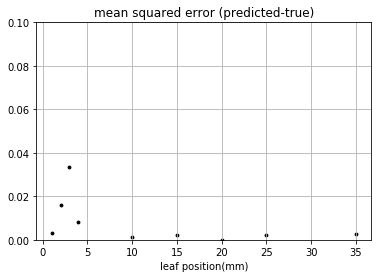

In [19]:
plt.scatter(errors[:,0], errors[:,1], s=8,c='k')
plt.ylim(0,0.1)
plt.title("mean squared error (predicted-true)")
plt.xlabel("leaf position(mm)")
plt.grid()
plt.show()

In [20]:
import numpy as np
from scipy.stats import norm

def plot_histo(preds, true, xmin, xmax, nbins_fit, nbins_hist=8):
    data = preds-true
    mean,std=norm.fit(data)
    plt.hist(data, bins=nbins_hist, density=True, facecolor='white',edgecolor ="k",  alpha=1, label="data")
    #xmin, xmax = plt.xlim()
    x = np.linspace(xmin,xmax, nbins_fit)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y, c='r', linestyle='-.', label='gaussian fit')
    plt.xlabel('prediction error [mm]')
    #plt.ylabel('Frequence')
    plt.title(r'$\mathrm{Resolution\ histogram:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, std))
    plt.legend(loc='upper right')
    return

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


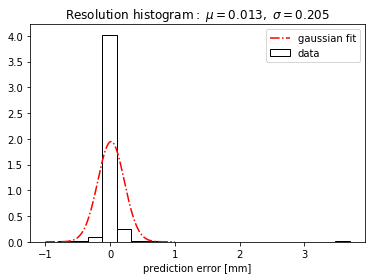

In [22]:
plot_histo(model.predict(X_test), y_test, -1.0,1.0, nbins_fit=200, nbins_hist=20)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


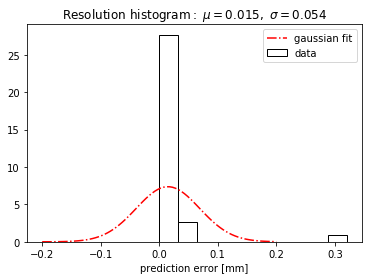

In [23]:
plot_histo(model.predict(X_1mm_cl_RF_test), y_1mm_cl_test, -0.2,0.2, nbins_fit=80, nbins_hist=10)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


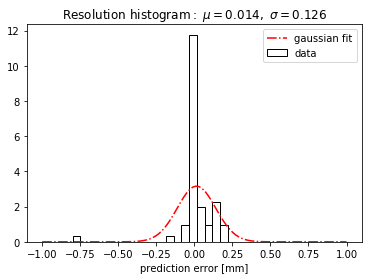

In [24]:
plot_histo(model.predict(X_2mm_cl_RF_test), y_2mm_cl_test, -1,1, nbins_fit=100, nbins_hist=20)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


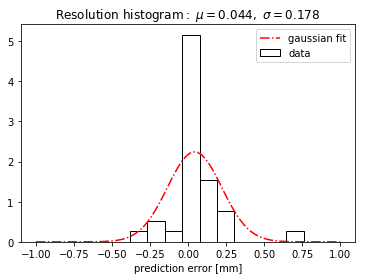

In [25]:
plot_histo(model.predict(X_3mm_cl_RF_test), y_3mm_cl_test, -1,1, nbins_fit=80, nbins_hist=10)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


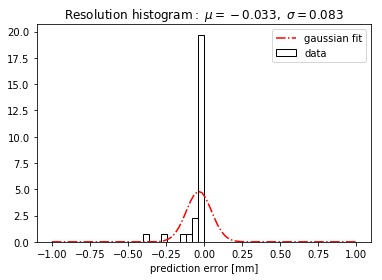

In [26]:
plot_histo(model.predict(X_4mm_cl_RF_test), y_4mm_cl_test, -1,1, nbins_fit=80, nbins_hist=10)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


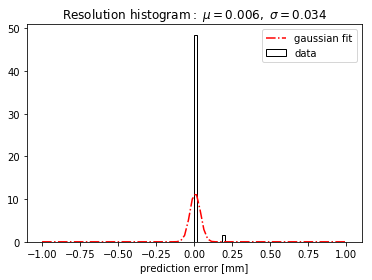

In [27]:
plot_histo(model.predict(X_10mm_cl_RF_test), y_10mm_cl_test, -1,1, nbins_fit=80, nbins_hist=10)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


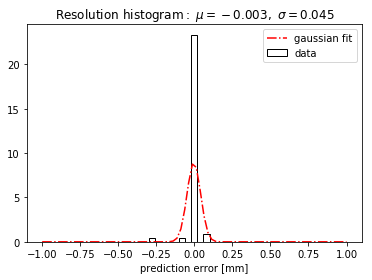

In [28]:
plot_histo(model.predict(X_15mm_cl_RF_test), y_15mm_cl_test, -1,1, nbins_fit=80, nbins_hist=10)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished
/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1662: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


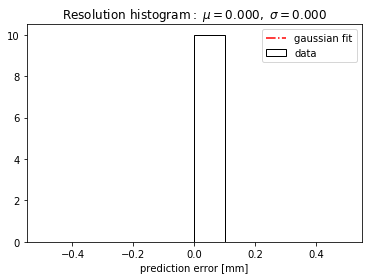

In [29]:
plot_histo(model.predict(X_20mm_cl_RF_test), y_20mm_cl_test, -1,1, nbins_fit=80, nbins_hist=10)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


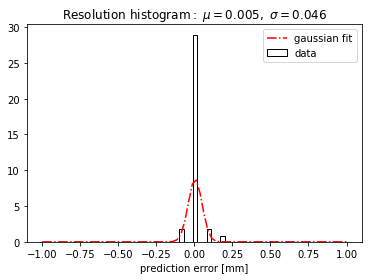

In [30]:
plot_histo(model.predict(X_25mm_cl_RF_test), y_25mm_cl_test, -1,1, nbins_fit=80, nbins_hist=10)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


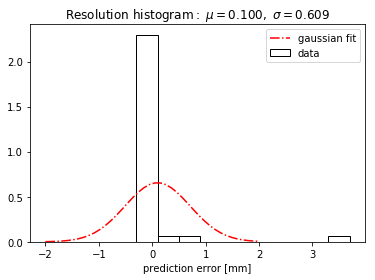

In [31]:
plot_histo(model.predict(X_30mm_cl_RF_test), y_30mm_cl_test, -2,2, nbins_fit=40, nbins_hist=10)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


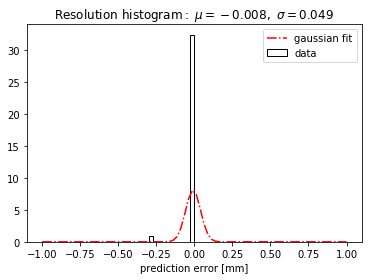

In [32]:
plot_histo(model.predict(X_35mm_cl_RF_test), y_35mm_cl_test, -1,1, nbins_fit=80, nbins_hist=10)

In [23]:
def import_splitted_UNet(pos):
    Xy = np.load(os.path.join(unet_dir,"Xy_"+pos+"_clean_predicted_UNet.npz"))
    X = Xy["y"]
    y = Xy["dist"]
    X_RF = cut_reshape(X)
    indices = np.load(os.path.join(data_folder,"RF_train_test_indices_80_20_"+pos+"_clean.npz"))
    training_indices = indices["train"]
    test_indices = indices["test"]
    X_RF_train = X_RF[training_indices]
    y_train = y[training_indices]
    X_RF_test = X_RF[test_indices]
    y_test = y[test_indices]
    return X_RF_train, y_train, X_RF_test, y_test

In [24]:
X_1mm_cl_UNet_RF_train, y_1mm_cl_UNet_train, X_1mm_cl_UNet_RF_test, y_1mm_cl_UNet_test  = import_splitted_UNet("1mm")
X_2mm_cl_UNet_RF_train, y_2mm_cl_UNet_train, X_2mm_cl_UNet_RF_test, y_2mm_cl_UNet_test  = import_splitted_UNet("2mm")
X_3mm_cl_UNet_RF_train, y_3mm_cl_UNet_train, X_3mm_cl_UNet_RF_test, y_3mm_cl_UNet_test  = import_splitted_UNet("3mm")
X_4mm_cl_UNet_RF_train, y_4mm_cl_UNet_train, X_4mm_cl_UNet_RF_test, y_4mm_cl_UNet_test  = import_splitted_UNet("4mm")
X_10mm_cl_UNet_RF_train, y_10mm_cl_UNet_train, X_10mm_cl_UNet_RF_test, y_10mm_cl_UNet_test  = import_splitted_UNet("10mm")
X_15mm_cl_UNet_RF_train, y_15mm_cl_UNet_train, X_15mm_cl_UNet_RF_test, y_15mm_cl_UNet_test  = import_splitted_UNet("15mm")
X_20mm_cl_UNet_RF_train, y_20mm_cl_UNet_train, X_20mm_cl_UNet_RF_test, y_20mm_cl_UNet_test  = import_splitted_UNet("20mm")
X_25mm_cl_UNet_RF_train, y_25mm_cl_UNet_train, X_25mm_cl_UNet_RF_test, y_25mm_cl_UNet_test  = import_splitted_UNet("25mm")
X_30mm_cl_UNet_RF_train, y_30mm_cl_UNet_train, X_30mm_cl_UNet_RF_test, y_30mm_cl_UNet_test  = import_splitted_UNet("30mm")
X_35mm_cl_UNet_RF_train, y_35mm_cl_UNet_train, X_35mm_cl_UNet_RF_test, y_35mm_cl_UNet_test  = import_splitted_UNet("35mm")

In [40]:
X_UNet_test = np.vstack((X_1mm_cl_UNet_RF_test, X_2mm_cl_UNet_RF_test, X_3mm_cl_UNet_RF_test, X_4mm_cl_UNet_RF_test, 
                         X_10mm_cl_UNet_RF_test, X_15mm_cl_UNet_RF_test, X_20mm_cl_UNet_RF_test, X_25mm_cl_UNet_RF_test, 
                         X_35mm_cl_UNet_RF_test))

y_UNet_test =  np.hstack((y_1mm_cl_UNet_test, y_2mm_cl_UNet_test, y_3mm_cl_UNet_test, y_4mm_cl_UNet_test, 
                          y_10mm_cl_UNet_test, y_15mm_cl_UNet_test, y_20mm_cl_UNet_test, y_25mm_cl_UNet_test, 
                          y_35mm_cl_UNet_test))

In [54]:
errors_unet = []
print("test",mean_squared_error(model.predict(X_UNet_test), y_UNet_test))
#print("1mm", mean_squared_error(model.predict(X_1mm_cl_UNet_RF_test), y_1mm_cl_UNet_test))
errors_unet.append([1, mean_squared_error(model.predict(X_1mm_cl_UNet_RF_test), y_1mm_cl_UNet_test)])

#print("2mm",mean_squared_error(model.predict(X_2mm_cl_UNet_RF_test), y_2mm_cl_UNet_test))
errors_unet.append([2, mean_squared_error(model.predict(X_2mm_cl_UNet_RF_test), y_2mm_cl_UNet_test)])

#print("3mm",mean_squared_error(model.predict(X_3mm_cl_UNet_RF_test), y_3mm_cl_UNet_test))
errors_unet.append([3, mean_squared_error(model.predict(X_3mm_cl_UNet_RF_test), y_3mm_cl_UNet_test)])

#print("4mm",mean_squared_error(model.predict(X_4mm_cl_UNet_RF_test), y_4mm_cl_UNet_test))
errors_unet.append([4, mean_squared_error(model.predict(X_4mm_cl_UNet_RF_test), y_4mm_cl_UNet_test)])

#print("10mm",mean_squared_error(model.predict(X_10mm_cl_UNet_RF_test), y_10mm_cl_UNet_test))
errors_unet.append([10, mean_squared_error(model.predict(X_10mm_cl_UNet_RF_test), y_10mm_cl_UNet_test)])

#print("15mm",mean_squared_error(model.predict(X_15mm_cl_UNet_RF_test), y_15mm_cl_UNet_test))
errors_unet.append([15, mean_squared_error(model.predict(X_15mm_cl_UNet_RF_test), y_15mm_cl_UNet_test)])

#print("20mm",mean_squared_error(model.predict(X_20mm_cl_UNet_RF_test), y_20mm_cl_UNet_test))
errors_unet.append([20, mean_squared_error(model.predict(X_20mm_cl_UNet_RF_test), y_20mm_cl_UNet_test)])

#print("25mm",mean_squared_error(model.predict(X_25mm_cl_UNet_RF_test), y_25mm_cl_UNet_test))
errors_unet.append([25, mean_squared_error(model.predict(X_25mm_cl_UNet_RF_test), y_25mm_cl_UNet_test)])

#print("30mm",mean_squared_error(model.predict(X_30mm_cl_UNet_RF_test), y_30mm_cl_UNet_test))
#errors_unet.append([30, mean_squared_error(model.predict(X_30mm_cl_UNet_RF_test), y_30mm_cl_UNet_test)])

#print("35mm",mean_squared_error(model.predict(X_35mm_cl_UNet_RF_test), y_35mm_cl_UNet_test))
errors_unet.append([35, mean_squared_error(model.predict(X_35mm_cl_UNet_RF_test), y_35mm_cl_UNet_test)])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


test 0.2230189255189255


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]

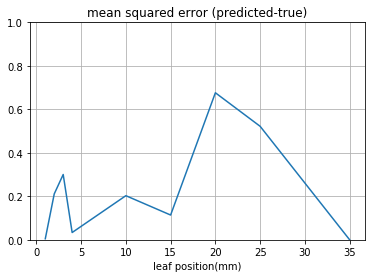

In [55]:

errors_unet = np.asarray(errors_unet)

plt.plot(errors_unet[:,0], errors_unet[:,1])
plt.ylim(0,1)
plt.title("mean squared error (predicted-true)")
plt.xlabel("leaf position(mm)")
plt.grid()
plt.show()


In [67]:
np.load(os.path.join(data_dir, "RF30_8_trained_model_clean_data.npz"))["rf"]

TypeError: list indices must be integers or slices, not str

In [65]:
ls /storage/yw18581/data/

10x10_10mm_clean/      10x10_4mm_clean/
10x10_10mm_v2_8bit/    10x10_4mm_v2/
10x10_15mm_clean/      10x10_4mm_v2_8bit/
10x10_15mm_v2_8bit/    10x10_4mm_v2_copy/
10x10_1mm_clean/       RF100_trained_model_clean_data.npz
10x10_1mm_v1/          RF200_trained_model_clean_data.npz
10x10_1mm_v1_8bit/     RF30_10_trained_model_clean_data.npz
10x10_20mm_clean/      RF30_20_trained_model_clean_data.npz
10x10_20mm_v1/         RF30_8_trained_model_clean_data.npz
10x10_25mm_8bit/       RF30_trained_model.npz
10x10_25mm_clean/      RF30_trained_model_clean_data.npz
10x10_25mm_v1/         RF30x_trained_model_clean_data.npz
10x10_2mm_8bit/        RF50_20_trained_model_clean_data.npz
10x10_2mm_8bit_clean/  UNet_1500epochs_Xy_test_pred.npz*
10x10_30mm_clean/      Xy_test.npz*
10x10_30mm_v1/         Xy_train.npz*
10x10_35mm_clean/      test_rf_1234.npz
10x10_35mm_v1/         train_validation_test/
10x10_3mm_clean/       trained_models/
10x10_3mm_v1/
